In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
from desi_retriever.plotter import plot as desi_plot
from desi_retriever.dr1 import get_specs, get_rvspec_models

# DR1

Fetching coadded spectra by survey/program, healpix and TARGETID 

In [3]:
SP = get_specs(survey='sv1',
               program='dark',
               hpx=17683,
               targetid=39627652591521181)[0]
print(SP)

https://data.desi.lbl.gov/public/dr1//spectro/redux/iron/healpix/sv1/dark/176/17683/coadd-sv1-dark-17683.fits
{'b_wavelength': array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ], dtype='>f8'), 'b_flux': array([17.780697, 17.944153, 20.370407, ..., 19.549887, 19.811869,
       19.616365], dtype='>f4'), 'r_wavelength': array([5760. , 5760.8, 5761.6, ..., 7618.4, 7619.2, 7620. ], dtype='>f8'), 'r_flux': array([19.23231 , 18.990128, 19.925873, ..., 12.459672, 12.192063,
       12.111976], dtype='>f4'), 'z_wavelength': array([7520. , 7520.8, 7521.6, ..., 9822.4, 9823.2, 9824. ], dtype='>f8'), 'z_flux': array([12.905071 , 13.580125 , 12.960547 , ...,  7.764064 ,  7.78188  ,
        7.7058964], dtype='>f4')}


Fetching the inverse variances and fibermaps

In [4]:
SP = get_specs(survey='sv1',
               program='dark',
               hpx=17683,
               targetid=39627652591521181,
               fibermap=True,
               ivar=True)[0]
print(SP.keys())

https://data.desi.lbl.gov/public/dr1//spectro/redux/iron/healpix/sv1/dark/176/17683/coadd-sv1-dark-17683.fits
dict_keys(['fibermap', 'b_wavelength', 'b_flux', 'r_wavelength', 'r_flux', 'z_wavelength', 'z_flux', 'b_ivar', 'r_ivar', 'z_ivar'])


## Fetching the corresponding RVSpecFit models

In [5]:
SPM = get_rvspec_models(survey='sv1',
                        program='dark',
                        hpx=17683,
                        targetid=39627652591521181)[0]

https://data.desi.lbl.gov/public/dr1/vac/dr1/mws/iron/v1.0/rv_output/240520//healpix/sv1/dark/176/17683/rvmod_coadd-sv1-dark-17683.fits


In [6]:
print(SPM)

{'b_wavelength': array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ], dtype='>f8'), 'b_model': array([18.7097823 , 18.99561061, 19.4164651 , ..., 19.38523922,
       19.38839107, 19.38271336], dtype='>f8'), 'r_wavelength': array([5760. , 5760.8, 5761.6, ..., 7618.4, 7619.2, 7620. ], dtype='>f8'), 'r_model': array([19.42021659, 19.43012812, 19.42964555, ..., 12.63963589,
       12.63731939, 12.63385098], dtype='>f8'), 'z_wavelength': array([7520. , 7520.8, 7521.6, ..., 9822.4, 9823.2, 9824. ], dtype='>f8'), 'z_model': array([12.99163099, 12.99168129, 12.99155571, ...,  7.86502231,
        7.86310622,  7.86131366], dtype='>f8')}


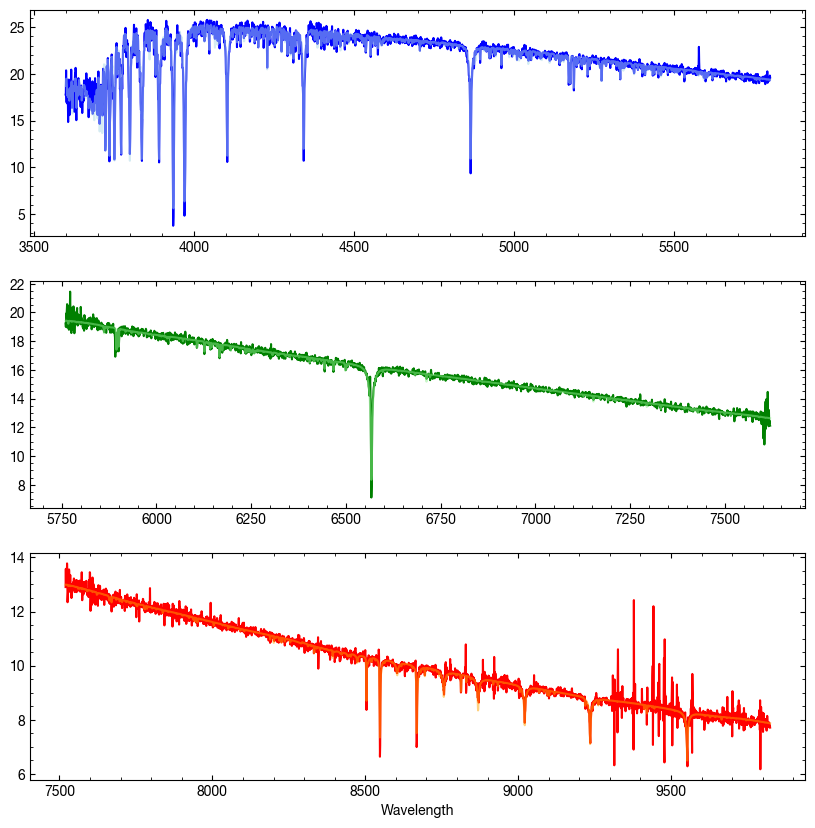

In [7]:
desi_plot(SP, model=SPM)

# Retrieving spectra by GAIA ID


It is also possible to fetch spectrau using just Gaia source_id

https://data.desi.lbl.gov/public/dr1//spectro/redux/iron/healpix/sv3/backup/98/9835/coadd-sv3-backup-9835.fits
https://data.desi.lbl.gov/public/dr1/vac/dr1/mws/iron/v1.0/rv_output/240520//healpix/sv3/backup/98/9835/rvmod_coadd-sv3-backup-9835.fits


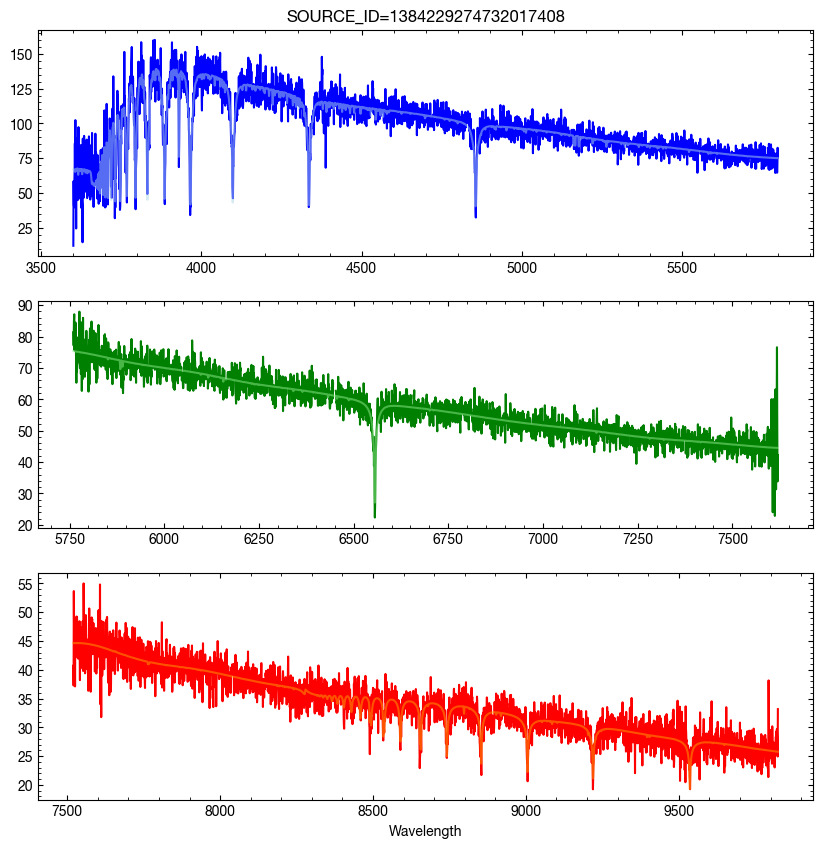

In [8]:
# Doing this for the first time may take a few seconds
# all the queries after that will be faster
my_sourceid = 1384229274732017408

desi_plot(get_specs(gaia_edr3_source_id=my_sourceid)[0],
          model=get_rvspec_models(gaia_edr3_source_id=my_sourceid)[0],
          title='SOURCE_ID=%d' % my_sourceid)